In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('BCW.csv', header = None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.columns = ["ID", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "C"]

In [7]:
B = data[data["C"] == 2]
M = data[data["C"] == 4]

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 1., 0., 0., 0., 0.

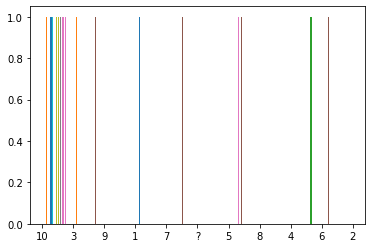

In [10]:
plt.hist(M["A6"], bins = 10)

In [11]:
Y = data["C"]

for i in range(len(Y)):
    if(Y.iloc[i] == 2):
        Y.iloc[i] = 1
    else:
        Y.iloc[i] = -1
        
print(Y)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0      1
1      1
2      1
3      1
4      1
5     -1
6      1
7      1
8      1
9      1
10     1
11     1
12    -1
13     1
14    -1
15    -1
16     1
17     1
18    -1
19     1
20    -1
21    -1
22     1
23    -1
24     1
25    -1
26     1
27     1
28     1
29     1
      ..
669   -1
670   -1
671    1
672    1
673    1
674    1
675    1
676    1
677    1
678    1
679    1
680   -1
681   -1
682    1
683    1
684    1
685    1
686    1
687    1
688    1
689    1
690    1
691   -1
692    1
693    1
694    1
695    1
696   -1
697   -1
698   -1
Name: C, Length: 699, dtype: int64


In [27]:
for i in range(len(data)):
    if(data.iloc[i,6] == '?'):
        if(data.iloc[i,9] == 2):
            data.iloc[i,6] = 1
        else:
            data.iloc[i,6] = 10


In [28]:
data.dtypes

ID     int64
A1     int64
A2     int64
A3     int64
A4     int64
A5     int64
A6    object
A7     int64
A8     int64
A9     int64
C      int64
dtype: object

In [29]:
data['A6'] = data["A6"].astype(str).astype(int)
data.dtypes

ID    int64
A1    int64
A2    int64
A3    int64
A4    int64
A5    int64
A6    int32
A7    int64
A8    int64
A9    int64
C     int64
dtype: object

In [31]:
X = data.drop(["ID"], axis = 1)
X = X.iloc[:,:-1].values
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [35]:
#Train-Test Function

def train_test_part(X,Y, frac):
    
    train_size = int(len(X)*frac)
    X_train = np.zeros((train_size, 9))
    X_test = np.zeros((len(X)-train_size, 9))
    Y_train = np.zeros((train_size, 1))
    Y_test = np.zeros((len(X)-train_size, 1))
    
    j=0
    while j < int(train_size):
        X_train[j] = X[j]
        Y_train[j] = Y[j]
        
        if(j<len(X)-train_size):
            X_test[j] = X[len(X)-1-j]
            Y_test[j] = Y[len(X)-1-j]
        
        j=j+1
        
    return X_train, X_test, Y_train, Y_test

In [42]:
#Linear SVM Training
def svm_train(X,Y,epochs):
    w = np.zeros(len(X[0]), dtype = int)
    alpha = 0.08
    
    for e in range(0, epochs):
        error = 0
        for i, X in enumerate(X):
            if(Y[i]*np.dot(X[i],w) <= 1):
                w = w+ alpha*((X[i]*Y[i]) + (-2*(1/epochs)*w))
            else:
                w = w+ alpha*(-2*(1/epochs)*w)
    return w
            

In [43]:
#LSVM Test
def svm_test(X,w1,Y):
    i=0
    Yp = np.zeros((len(X),1))
    error = 0
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    
    while i<len(X):
        Yp[i] = np.dot(X[i],w1)
        if(Yp[i] < -1):
            Yp =  -1
            if(Y[i] == -1):
                tn = tn+1
            elif(Y[i] == 1):
                fn = fn+1
                
        else:
            Yp[i] = 1
            if(Y[i] == 1):
                tp=tp+1
            elif(Y[i] == -1):
                fp = fp+1
        if(Y[i] != Yp[i]):
            error+=1
            
        i=i+1
        
    predict = (error/len(Y))*100
    accuracy = 100-predic
    return accuracy, tp/len(X), tn/len(X), fp/len(X), fn/len(X)

In [44]:
#Tuned parameter w1

X_train, X_test, Y_train, Y_test = train_test_part(X,Y,0.7)

w1 = svm_train(X_train,Y_train, epochs = 1000)
print(w1)

ac,tp, tn, fp, fn = svm_test(X_test, w1, Y_test)
print('accuracy = ', ac)
print('true positive = ', tp)
print('true negatice = ', tn)
print('false positive = ', fp)
print('false positive = ', fn)

plt.xlabel('false positives')
plt.ylabel('true positives')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(fp/(fp+tn), tp/(tp+fn), '-o')
plt.plot([0,1], [0,1], '-o')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()